In [3]:
### import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Load dataset
df = pd.read_csv("C:/Users/enuzo/Documents/Project Portfolio/machine_learning/new datasets/loan_prediction/Loan_default.csv")

display(df.head())

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
#Basic Info & Summary
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 

In [5]:
#Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


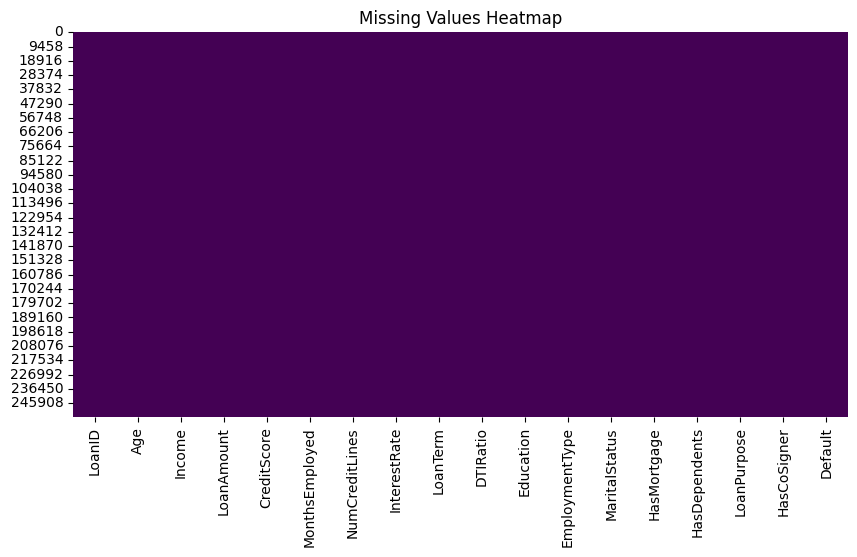

In [6]:
#Visualizing Missing Data
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

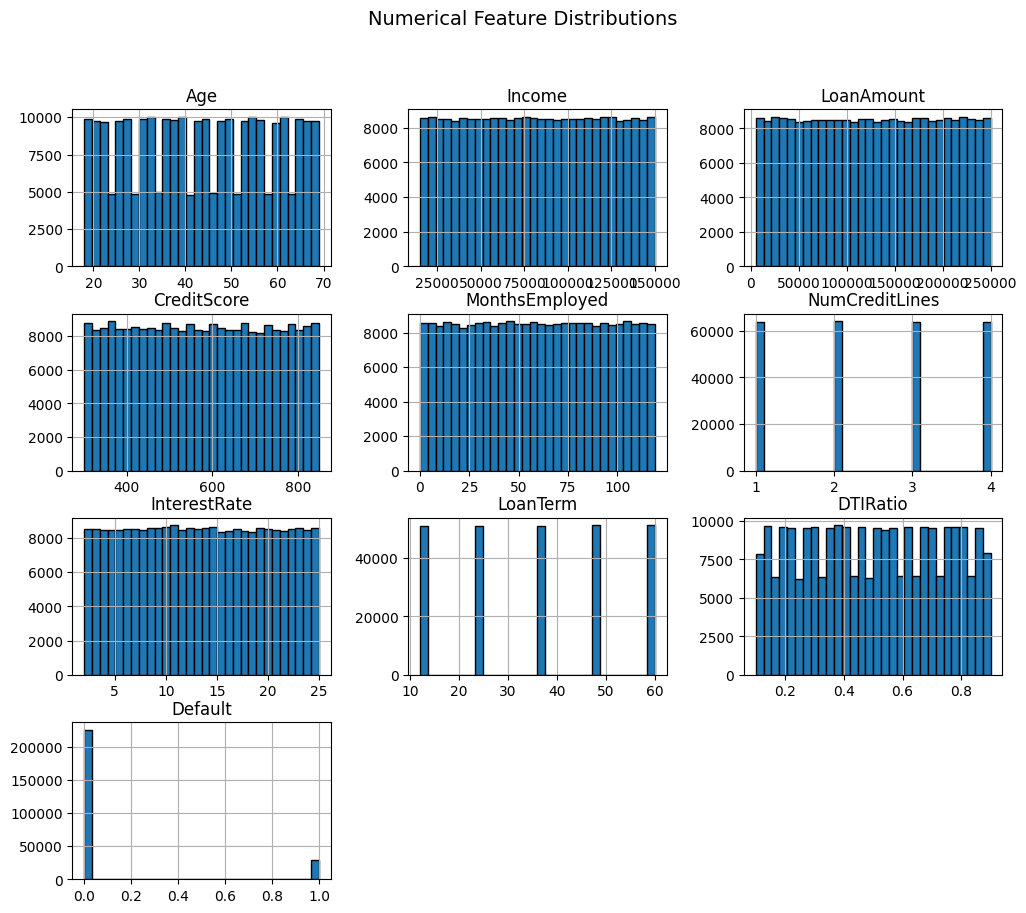

In [7]:
# Distribution of Numerical Features
num_features = df.select_dtypes(include=['int64', 'float64']).columns

df[num_features].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Numerical Feature Distributions", fontsize=14)
plt.show()


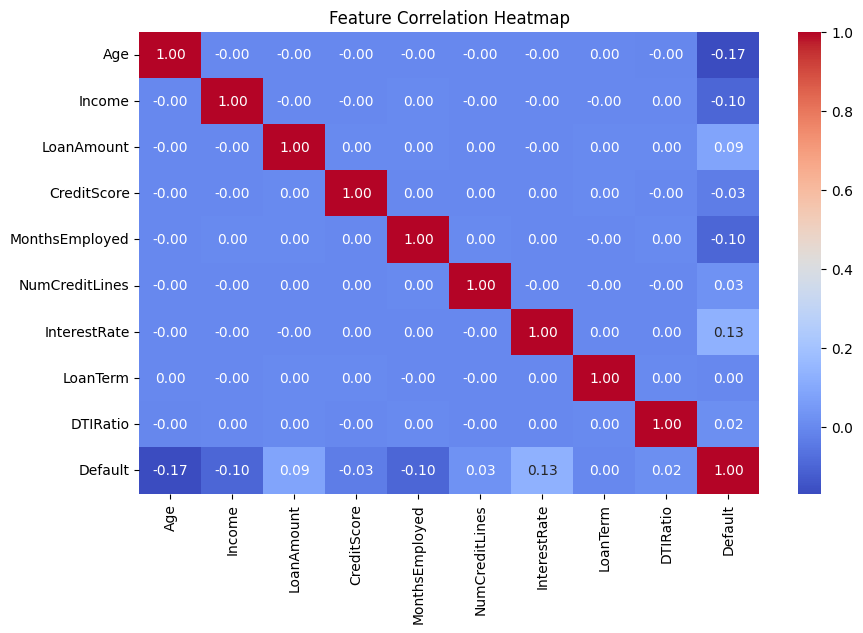

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))

# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation and plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Drop identifier column
df.drop(columns=["LoanID"], inplace=True)

# Ensure Target Column is Binary (0 or 1)
df["Default"] = df["Default"].apply(lambda x: 1 if x > 0 else 0)

# Identify numerical and categorical columns
num_features = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", 
                "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio"]

cat_features = ["Education", "EmploymentType", "MaritalStatus", 
                "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]

# Create a copy to scale and encode
df_processed = df.copy()

# Standardize numerical features
scaler = StandardScaler()
df_processed[num_features] = scaler.fit_transform(df[num_features])

# One-hot encode categorical features (drop_first to avoid multicollinearity)
df_processed = pd.get_dummies(df_processed, columns=cat_features, drop_first=True).astype(int)

# ✅ Ensure the target column is still present and is the last column
if 'Default' not in df_processed.columns:
    df_processed['Default'] = df['Default']  # Add it back if dropped accidentally

# Preview first few rows
print("✅ Preview of Preprocessed Dataset:")
display(df_processed.head())

# Check for missing values
print("\nMissing Values:")
print(df_processed.isnull().sum())

# Save to CSV
df_processed.to_csv("data/preprocessed_loan_data.csv", index=False)
print("\n✅ Preprocessed dataset saved to: data/preprocessed_loan_data.csv")

✅ Preview of Preprocessed Dataset:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0,0,-1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
1,1,0,0,0,-1,-1,-1,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,0,0
3,0,-1,-1,1,-1,0,0,0,-1,0,...,0,1,0,0,0,1,0,0,0,0
4,1,-1,-1,0,-1,1,-1,0,0,0,...,1,0,0,0,1,0,0,0,0,0



Missing Values:
Age                             0
Income                          0
LoanAmount                      0
CreditScore                     0
MonthsEmployed                  0
NumCreditLines                  0
InterestRate                    0
LoanTerm                        0
DTIRatio                        0
Default                         0
Education_High School           0
Education_Master's              0
Education_PhD                   0
EmploymentType_Part-time        0
EmploymentType_Self-employed    0
EmploymentType_Unemployed       0
MaritalStatus_Married           0
MaritalStatus_Single            0
HasMortgage_Yes                 0
HasDependents_Yes               0
LoanPurpose_Business            0
LoanPurpose_Education           0
LoanPurpose_Home                0
LoanPurpose_Other               0
HasCoSigner_Yes                 0
dtype: int64

✅ Preprocessed dataset saved to: data/preprocessed_loan_data.csv
